In [5]:
pip install pandas scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# Load the dataset
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [8]:
#Checking all columns 
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
# Select only relevant columns
df = df[['Review Text', 'Recommended IND']].dropna()

In [11]:
# Rename columns for easier access
df.columns = ['review_text', 'sentiment']

In [12]:
# Convert sentiment to categorical (1 = Positive, 0 = Negative)
df['sentiment'] = df['sentiment'].astype(int)

In [13]:
# Display data overview
print(df.head())

                                         review_text  sentiment
0  Absolutely wonderful - silky and sexy and comf...          1
1  Love this dress!  it's sooo pretty.  i happene...          1
2  I had such high hopes for this dress and reall...          0
3  I love, love, love this jumpsuit. it's fun, fl...          1
4  This shirt is very flattering to all due to th...          1


Text Preprocessing

In [37]:
import nltk
nltk.download('stopwords', download_dir='/path/to/local/nltk_data')
nltk.download('punkt', download_dir='/path/to/local/nltk_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     /path/to/local/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to /path/to/local/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [47]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [50]:
import nltk
nltk.data.path.append("C:/Users/Welcome/nltk_data")  # Adjust path as per your system
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('english'))

# Function to clean text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)


In [51]:
df['cleaned_text'] = df['review_text'].astype(str).apply(preprocess_text)
print(df[['review_text', 'cleaned_text']].head())

                                         review_text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                                        cleaned_text  
0        absolutely wonderful silky sexy comfortable  
1  love dress sooo pretty happened find store gla...  
2  high hopes dress really wanted work initially ...  
3  love love love jumpsuit fun flirty fabulous ev...  
4  shirt flattering due adjustable front tie perf...  


TF-IDF Vectorization

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)
# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Train Logistic Regression Model

In [55]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8918
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       812
           1       0.90      0.97      0.94      3717

    accuracy                           0.89      4529
   macro avg       0.85      0.75      0.79      4529
weighted avg       0.89      0.89      0.88      4529



Plot in Graph

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Welcome\AppData\Local\Temp\ipykernel_17016\135382860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['red', 'blue'])


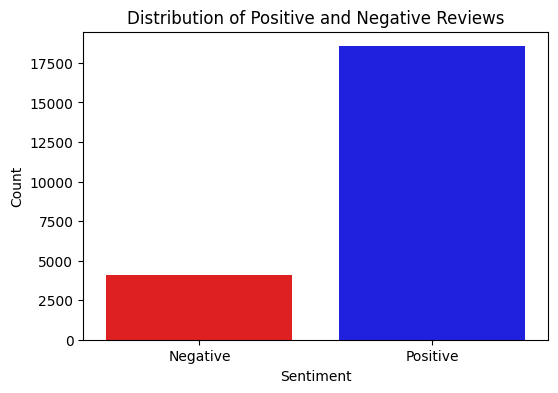

In [58]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['red', 'blue'])
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Positive and Negative Reviews")
plt.show()

Heatmap of Model Accuracy

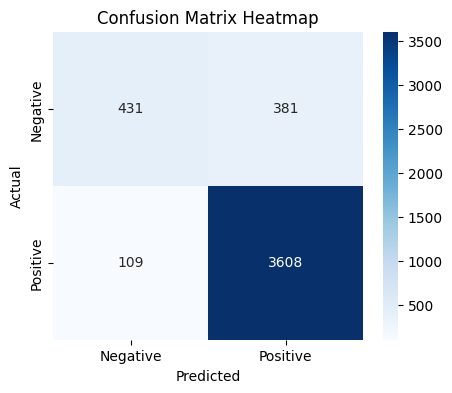

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()